# import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings('ignore')

# read csv file

In [2]:
df = pd.read_csv("voyage-reports.csv")

print("\nFeatures Name")
print("==================\n")
print(list(df.columns))


Features Name

['Vessel Name', 'Vessel Type', 'Vessel Capacity/Size (Gross Tonnes)', 'Load Date', 'Category of Trade', 'Cargo Description', 'Volume/ Amount', 'Volume Type', 'Load Port', 'Discharge Port', 'Dangerous Goods', 'Organisation', 'Application Number', 'Licence Number', 'Voyage Number']


In [3]:
for i in df:
    print("\nStatistics of dataset Columns")
    print("==============================")
    print(df[[i]].describe())


Statistics of dataset Columns
              Vessel Name
count               21587
unique               4284
top     ICS Silver Lining
freq                  583

Statistics of dataset Columns
       Vessel Type
count        10376
unique         234
top      Container
freq          2175

Statistics of dataset Columns
       Vessel Capacity/Size (Gross Tonnes)
count                                 7741
unique                                 863
top                                 47,000
freq                                   521

Statistics of dataset Columns
        Load Date
count       21589
unique       3439
top     2/10/2018
freq           25

Statistics of dataset Columns
       Category of Trade
count              21589
unique                 8
top             Dry Bulk
freq                6230

Statistics of dataset Columns
       Cargo Description
count              16351
unique                48
top      Petroleum Clean
freq                2482

Statistics of dataset Columns
   

## data statistics 

In [29]:
# get target column from dataframe
CLASSES = df['Organisation'].unique()

print("\nNumber of Clesses = ", len(CLASSES))
print("==========================\n")

print("\nClesses Names")
print("=============\n")
print(CLASSES)


Number of Clesses =  81


Clesses Names

['Viva Energy Australia Ltd' 'Teekay Shipping (Australia) Pty Ltd'
 'BP Australia Pty Ltd' 'Asiaworld Shipping Service Pty Ltd'
 'CSL Australia Pty Ltd' 'Seaway Agencies'
 'The China Navigation Company Pte Ltd' 'Maersk Line A/S'
 'Wallenius Wilhelmsen Logistics' 'Orica Australia Pty Ltd'
 'Incitec Pivot Limited' 'BHPB Freight Pty Ltd' 'K Line Australia Pty Ltd'
 'Inco Ships Pty Ltd' 'Bluescope Steel (AIS) Pty Ltd'
 'OOCL Australia Pty Ltd' 'NYK Line Australia'
 'Caltex Australia Petroleum Pty Ltd' 'Q Coast Shipping Pty Ltd'
 'APL Co Pte Ltd' 'Inchcape Shipping Services' 'Rio Tinto Marine'
 'Wilmar BioEthanol Pty Ltd' 'Wilmar Sugar Pty Ltd'
 'Mobil Oil Australia Pty Ltd' 'DONT USE Bemax Resources Ltd'
 'Pacific Asia Express' 'Coogee Energy Pty Ltd'
 'Braemar ACM Shipbroking Pty Ltd' 'INTERACID AUSTRALIA PTY LTD'
 'CMA CGM & ANL Australia Agencies' 'Mitsui OSK Lines Australia Pty Ltd'
 'BBC chartering Australia Pty Ltd' 'Trans Global projects Pty

## visualization of data samples

In [30]:
# extract features 
features_data = df[['Category of Trade', 'Volume/ Amount',
       'Volume Type', 'Load Port', 'Discharge Port', 'Dangerous Goods',]]

# print shape of the features
print("\nSelected Features shape :", features_data.shape)
print("======================================\n")

# print selected features
print("\nSelected Features")
print("=================\n")
features_data.head()


Selected Features shape : (21589, 6)


Selected Features



,Category of Trade,Volume/ Amount,Volume Type,Load Port,Discharge Port,Dangerous Goods
0,Petroleum,"26,726",MT,Geelong,Kwinana,Yes
1,Other Bulk Liquids,"2,600",MT,Newcastle,Portland,Yes
2,Petroleum,"10,710",MT,Brisbane,Adelaide,Yes
3,Petroleum,"21,611",MT,Brisbane,Newcastle,Yes
4,Petroleum,"5,139",MT,Botany,Adelaide,Yes


In [31]:
target = df[['Organisation']]

# print target class
print("\nTarget Class")
print("==============\n")
target.head(2)


Target Class



,Organisation
0,Viva Energy Australia Ltd
1,Teekay Shipping (Australia) Pty Ltd


## plot class distribution

Text(0.5, 0, 'Number of samples in dataset')

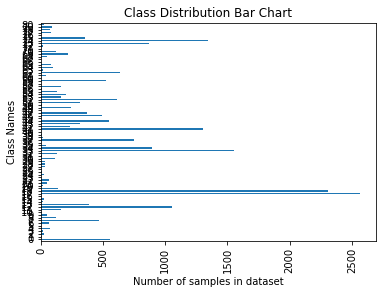

In [32]:
# extract target column and group_by it
abc = df.groupby('Organisation').size()
# convert column into dataframe
target_df = pd.DataFrame({'Organisation': abc.index, 'vals': list(abc)})

from matplotlib import pyplot as plt
# plot grapgh
target_df['vals'].plot(kind='barh')
# set axis lables and title
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Class Distribution Bar Chart")
plt.ylabel("Class Names")
plt.xlabel("Number of samples in dataset")

# Label Encoding

In [9]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        le_dict = {}
        if self.columns is not None:
            for col in self.columns:
                le = LabelEncoder()
                output[col] = le.fit_transform(output[col])
                le_dict[col] = le
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output, le_dict

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [33]:
# get non_numerical fetaures
encoder_features = features_data[['Category of Trade', 'Volume Type', 'Load Port', 'Discharge Port', 'Dangerous Goods',]]
# pass feature to lable encoder class that encode each feature one by one
encoder_features, le_dict = MultiColumnLabelEncoder(columns = encoder_features.columns).fit_transform(encoder_features)

# display the dataframe after label encoding
print("\nLabel Encoder Dataframe")
print("=================\n")
print(encoder_features.head(2))

# display dictionary of label encoders
print("\n\nDictionary of Label Encoders")
print("==============================\n")
print(le_dict,"\n")

# save label encoders dictionary
with open('le_dict.pickle', 'wb') as file:
    pickle.dump(le_dict, file, protocol=pickle.HIGHEST_PROTOCOL)


Label Encoder Dataframe

   Category of Trade  Volume Type  Load Port  Discharge Port  Dangerous Goods
0                  7            1         27              34                2
1                  5            1         44              54                2


Dictionary of Label Encoders

{'Category of Trade': LabelEncoder(), 'Volume Type': LabelEncoder(), 'Load Port': LabelEncoder(), 'Discharge Port': LabelEncoder(), 'Dangerous Goods': LabelEncoder()} 



In [34]:
# join the encoded features and prepare finalize dataframe
features_data[['Category of Trade', 'Volume Type', 'Load Port', 'Discharge Port', 'Dangerous Goods']] = encoder_features[['Category of Trade', 'Volume Type', 'Load Port', 'Discharge Port', 'Dangerous Goods']]
clean_df = features_data[['Volume/ Amount', 'Category of Trade', 'Volume Type', 'Load Port', 'Discharge Port', 'Dangerous Goods']]

# display cleaned dataframe after label encoding
print("\nclean Dataframe")
print("=================\n")
clean_df.head()


clean Dataframe



,Volume/ Amount,Category of Trade,Volume Type,Load Port,Discharge Port,Dangerous Goods
0,"26,726",7,1,27,34,2
1,"2,600",5,1,44,54,2
2,"10,710",7,1,8,0,2
3,"21,611",7,1,8,40,2
4,"5,139",7,1,6,0,2


## Target class encoding

In [35]:
# initialize label encoder and encode the target/class column of dataset
le = LabelEncoder()
target['Organisation'] = le.fit_transform(target['Organisation'])

In [36]:
print("\nShape of Features Dataframe :", clean_df.shape)
print("============================\n")

print("\nShape of Class Dataframe :", target.shape)
print("============================\n")


Shape of Features Dataframe : (21589, 6)


Shape of Class Dataframe : (21589, 1)



In [37]:
# save target column label encoder
output = open('target_encoder.pkl', 'wb')
pickle.dump(le, output)
output.close()

## preppare final dataframe

In [38]:
# make copy
all_features = features_data.copy()
# append class column
all_features['Organisation'] = target['Organisation']

print("\nShape of Final Dataframe :", all_features.shape)
print("============================\n")

print("\nFinal Dataframe")
print("===============\n")
all_features.head()


Shape of Final Dataframe : (21589, 7)


Final Dataframe



,Category of Trade,Volume/ Amount,Volume Type,Load Port,Discharge Port,Dangerous Goods,Organisation
0,7,"26,726",1,27,34,2,73
1,5,"2,600",1,44,54,2,69
2,7,"10,710",1,8,0,2,12
3,7,"21,611",1,8,40,2,12
4,7,"5,139",1,6,0,2,12


## plot correlation metrics

In [39]:
# plot correlation graph
corr = all_features.corr()
# congigure backgound colors scheme
corr.style.background_gradient(cmap='coolwarm')

,Category of Trade,Volume Type,Load Port,Discharge Port,Dangerous Goods,Organisation
Category of Trade,1.000000,-0.422956,-0.091438,-0.043481,0.531135,0.160264
Volume Type,-0.422956,1.000000,0.037284,-0.177869,-0.166779,-0.026099
Load Port,-0.091438,0.037284,1.000000,-0.083486,-0.011709,-0.049692
Discharge Port,-0.043481,-0.177869,-0.083486,1.000000,-0.026711,-0.029774
Dangerous Goods,0.531135,-0.166779,-0.011709,-0.026711,1.000000,0.005337
Organisation,0.160264,-0.026099,-0.049692,-0.029774,0.005337,1.000000


## Grapghs

In [40]:
# display finalized dataframe samples
all_features.head()

,Category of Trade,Volume/ Amount,Volume Type,Load Port,Discharge Port,Dangerous Goods,Organisation
0,7,"26,726",1,27,34,2,73
1,5,"2,600",1,44,54,2,69
2,7,"10,710",1,8,0,2,12
3,7,"21,611",1,8,40,2,12
4,7,"5,139",1,6,0,2,12


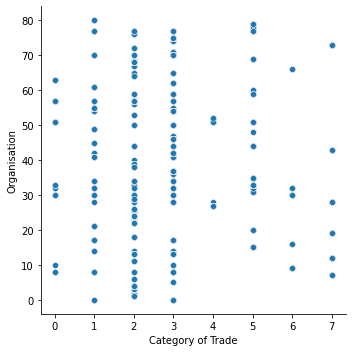

In [41]:
import seaborn as sns
# plot scatter plot between category of trade and class column
sns.relplot(x="Category of Trade", y="Organisation", data=all_features)

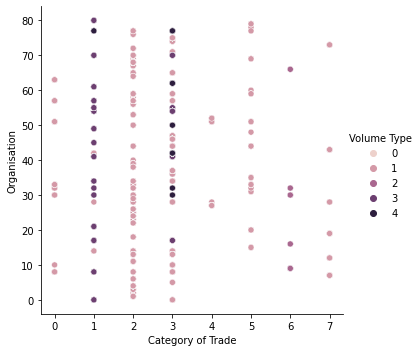

In [21]:
# plot scatter plot between category of trade and class column by selecting hue
sns.relplot(x="Category of Trade", y="Organisation", hue="Volume Type", data=all_features)

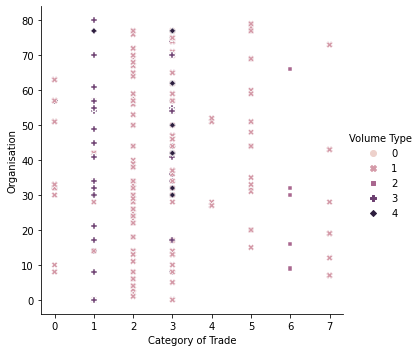

In [42]:
# plot scatter plot between category of trade and class column by different congiguration
sns.relplot(x="Category of Trade", y="Organisation", hue="Volume Type", style="Volume Type", data=all_features)

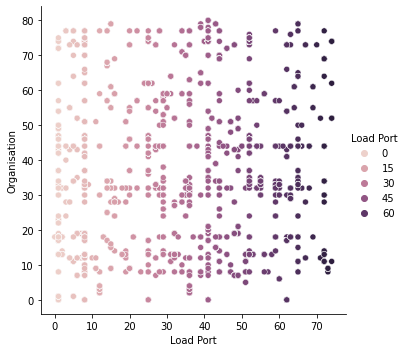

In [43]:
# plot scatter plot between category of trade and class column
sns.relplot(x="Load Port", hue="Load Port", y="Organisation", data=all_features)

## save clean files

In [44]:
# save finalize dataframe in csv file
all_features.to_csv("dataset.csv", index=False)